## k-NN, Decision Tree, Naive Bayes, SVM, Simple Neural Network For Crop Prediciton

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv


## Read Data

In [2]:
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv')

## Analyzing and Cleaning The Data

In [3]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [5]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [6]:
num_class = df['Crop'].nunique()
num_class

22

In [7]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


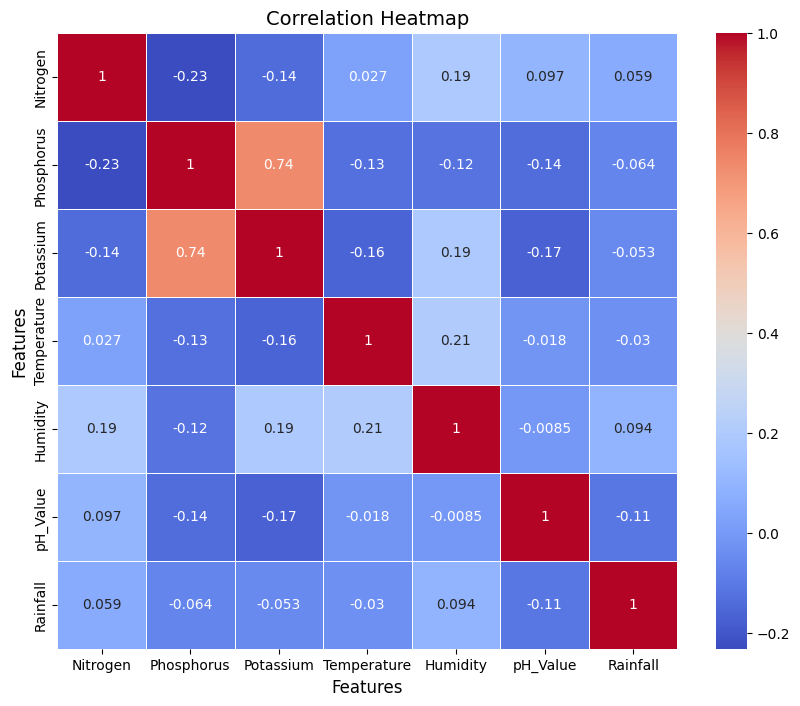

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.drop(['Crop'], axis=1)
plot = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(plot, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.show()

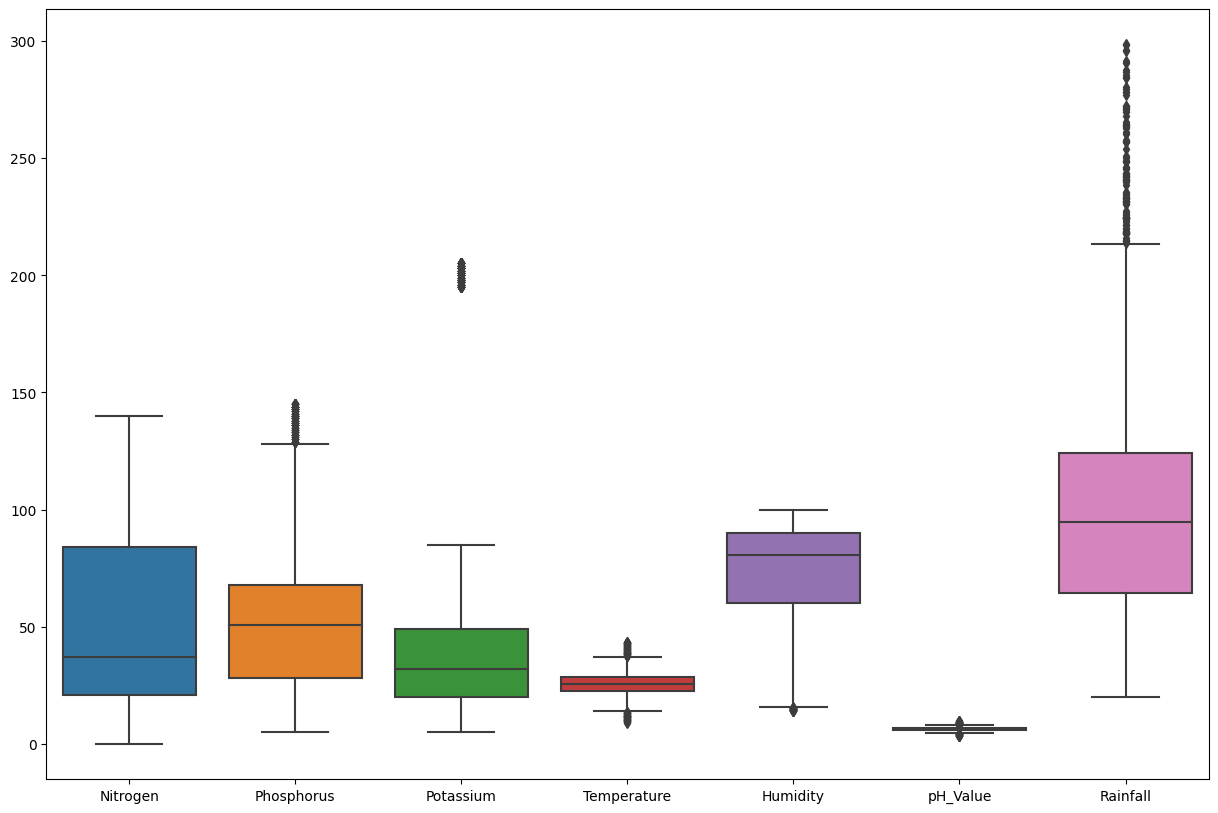

In [9]:
plt.figure(figsize=(15, 10))
sns.boxplot(df)
plt.show()

## The Models

#### Import Dependencies

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Decicion Tree
from sklearn.tree import DecisionTreeClassifier
# Naive Bayes Models
from sklearn.naive_bayes import GaussianNB, BernoulliNB
# SUpport Vector Machine
from sklearn.svm import SVC
# Artificial Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

2024-05-15 18:44:47.377381: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 18:44:47.377503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 18:44:47.509943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### Preparing The Data, Train Data, and Test Data

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
print(f"X Shape = {X.shape}")
print(f"y Shape = {y.shape}")


X Shape = (2200, 7)
y Shape = (2200,)


#### k-NN

with k=5

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {knn_accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00        14
           8       0.81      0.96      0.88        23
           9       0.91      1.00      0.95        20
          10       0.69      1.00      0.81        11
          11       1.00      0.90      0.95        21
          12       0.90      1.00      0.95        19
          13       1.00      0.83      0.91        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

find the best k

In [13]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')  # 10-fold cross-validation
    k_scores.append(scores.mean())

# Find the value of k with the highest cross-validation score
best_k = k_range[np.argmax(k_scores)]
print(f'The best value for k is: {best_k}')

# Step 6: Evaluate the model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with k={best_k}: {knn_accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

The best value for k is: 1
Accuracy with k=1: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.90      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00        14
           8       0.81      0.91      0.86        23
           9       0.91      1.00      0.95        20
          10       0.69      1.00      0.81        11
          11       1.00      0.90      0.95        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
       

#### Decision Tree

In [14]:
# Decision Tree
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {dt_accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.91      0.87      0.89        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       0.95      1.00      0.97        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

#### Gaussian Naive Bayes

In [15]:
gaussian_nb = GaussianNB()

gaussian_nb.fit(X_train, y_train)

y_pred = gaussian_nb.predict(X_test)

# Calculate accuracy
gNB_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {gNB_accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

#### Bernoulli Naive Bayes

In [16]:
bernoulli_nb = BernoulliNB()

bernoulli_nb.fit(X_train, y_train)

y_pred = bernoulli_nb.predict(X_test)

# Calculate accuracy
bNB_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {bNB_accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.95      0.86      0.90        21
           2       0.67      0.90      0.77        20
           3       1.00      1.00      1.00        26
           4       0.96      0.85      0.90        27
           5       0.85      1.00      0.92        17
           6       0.70      0.94      0.80        17
           7       0.88      1.00      0.93        14
           8       0.44      0.52      0.48        23
           9       0.71      1.00      0.83        20
          10       0.46      0.55      0.50        11
          11       1.00      0.67      0.80        21
          12       0.60      0.79      0.68        19
          13       0.67      0.33      0.44        24
          14       0.95      1.00      0.97        19
          15       0.55      1.00      0.71        17
          16       0.48      0.79      0.59

#### Support Vector Machine

In [17]:
svm = SVC(random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {svm_accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.78      0.91      0.84        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00

#### Artificial Neural Network

In [18]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_class = y_categorical.shape[1]

# Initialize the ANN
ann = Sequential()
ann.add(Input(shape=(X.shape[1],)))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=16, activation='relu'))
ann.add(Dense(units=num_class, activation='softmax'))

# Compile the model
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ANN on the training data
history = ann.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1)


Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0969 - loss: 3.0294 - val_accuracy: 0.2102 - val_loss: 2.8248
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1838 - loss: 2.7800 - val_accuracy: 0.2614 - val_loss: 2.5174
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3168 - loss: 2.4581 - val_accuracy: 0.4318 - val_loss: 2.1427
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4572 - loss: 2.0912 - val_accuracy: 0.5284 - val_loss: 1.7404
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5895 - loss: 1.6885 - val_accuracy: 0.6705 - val_loss: 1.3656
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7163 - loss: 1.2861 - val_accuracy: 0.7386 - val_loss: 1.0624
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 0.9970 - val_accuracy: 0.8011 - val_loss: 0.8282
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8663 - loss: 0.7488 - val_accuracy: 0.8636 - val_loss:

In [19]:
test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')
ann_accuracy = test_accuracy

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9517 - loss: 0.1059 
Test accuracy: 0.9545454382896423


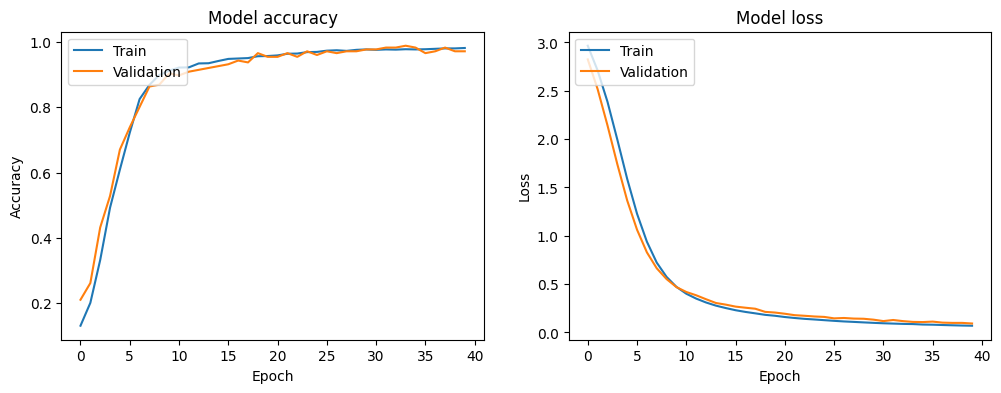

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

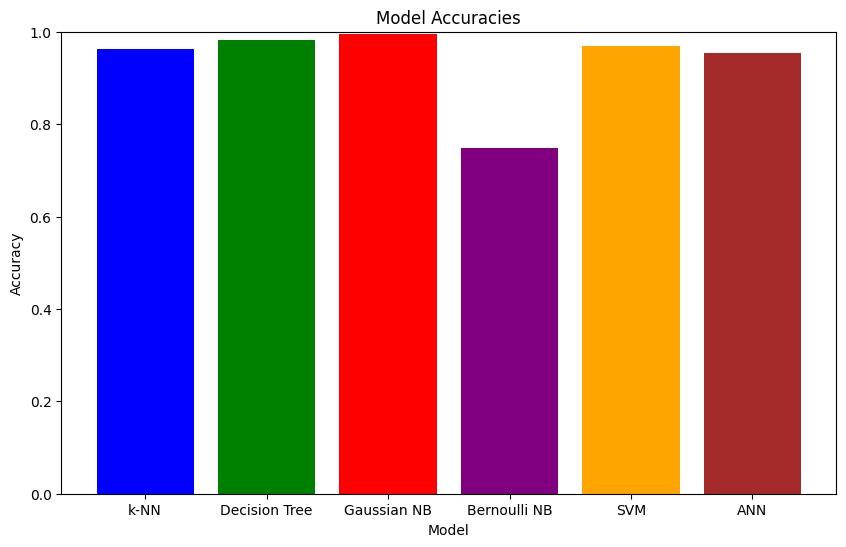

In [21]:
models = ['k-NN', 'Decision Tree', 'Gaussian NB', 'Bernoulli NB', 'SVM', 'ANN']
accuracies = [knn_accuracy, dt_accuracy, gNB_accuracy, bNB_accuracy, svm_accuracy, ann_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.ylim([0, 1])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

## Conclusion

In this dataset, the best performing model is Gaussian Naive Bayes